In [0]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import math

'''This function will map the label column values as M(Malignant)=1 and B(Benign)=0'''
def convert_result (x):
    if x == 'M':
        return 1
    return 0

'''Reading the dataset into a Pandas dataframe'''
WDBC_df = pd.read_csv('wdbc.dataset', header=None)

'''Converting the categorical label column to numerical'''
WDBC_df[1] = WDBC_df[1].apply(convert_result)

'''Shuffling the data for better output'''
WDBC_df = shuffle(WDBC_df)

'''Creating the output values'''
Y = WDBC_df[1].copy()

'''Dropping the unnecessary ID column and the labels colums'''
X = WDBC_df.drop([0,1], axis = 1)

'''Normalizing the data for better performance'''
X = normalize(X)

'''Splitting the data as 700% training and 30% testing'''
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

'''Further splitting test data as 15% validation and 15% test sets'''
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5)


'''Implementation of the sigmoid function'''
def sigmoid(x):
    
    val= (1/(1+np.exp(-1*x)))    
    
    return val

In [0]:
'''Training the dataframe for a fixed number of epochs and varying the learning rate'''

def train_learning_rates(X_train, Y_train, learning_rate):

    X_train = X_train.T
    Y_train = np.array(Y_train).reshape(1, Y_train.shape[0])
    
    '''Initializing the weights matrix to 0'''
    W = np.zeros((X_train.shape[0], 1))
    
    '''Initializing bias to 0'''
    b = 0
    m = X.shape[1] # No of input samples
    losstrack = [] # To store losses at very epoch
    iterations = 10000
    
    for iterations in range(iterations):
        
        z = np.dot(W.T, X_train) + b # Initial predictions
        p = sigmoid(z) # Predictions in the range [0,1]
        cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m  #Cost function to calculate the loss at every epoch
        losstrack.append(np.squeeze(cost)) 
        
        '''Finding derivatives'''
        dz = p - Y_train
        dW = (1/m) * np.dot(X_train, dz.T)
        db = (1/m) * np.sum(dz)

        '''Updating the weights and biases after each epoch'''
        W = W - learning_rate * dW
        b = b - learning_rate * db

    return W, b, losstrack

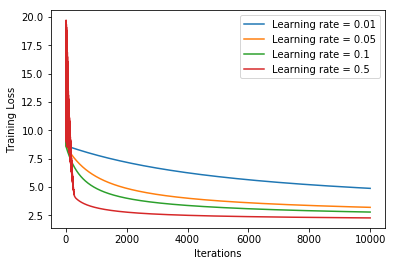

In [3]:
import matplotlib.pyplot as plt


'''Considering learning rates of 0.01, 0.05, 0.1, 0.5 and storing the weight, bias and loss obtained from the training for the training set'''

weight1, bias1 , loss1 = train_learning_rates(X_train, Y_train, 0.01)
plt.plot(loss1, label = "Learning rate = 0.01") 


weight2, bias2 , loss2 = train_learning_rates(X_train, Y_train, 0.05)
plt.plot(loss2, label = "Learning rate = 0.05")


weight3, bias3 , loss3 = train_learning_rates(X_train, Y_train, 0.1)
plt.plot(loss3, label = "Learning rate = 0.1")


weight4, bias4 , loss4 = train_learning_rates(X_train, Y_train, 0.5)
plt.plot(loss4, label = "Learning rate = 0.5")


plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.legend(loc = 'upper right')

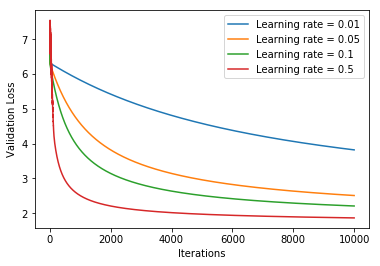

In [4]:
'''Considering learning rates of 0.01, 0.05, 0.1, 0.5 and storing the weight, bias and loss obtained from the training for the validation set'''

val_weight1, val_bias1 , val_loss1 = train_learning_rates(X_val, Y_val, 0.01)
plt.plot(val_loss1, label = "Learning rate = 0.01")


val_weight2, val_bias2 , val_loss2 = train_learning_rates(X_val, Y_val, 0.05)
plt.plot(val_loss2, label = "Learning rate = 0.05")


val_weight3, val_bias3 , val_loss3 = train_learning_rates(X_val, Y_val, 0.1)
plt.plot(val_loss3, label = "Learning rate = 0.1")


val_weight4, val_bias4 , val_loss4 = train_learning_rates(X_val, Y_val, 0.5)
plt.plot(val_loss4, label = "Learning rate = 0.5")


plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.legend(loc = 'upper right')

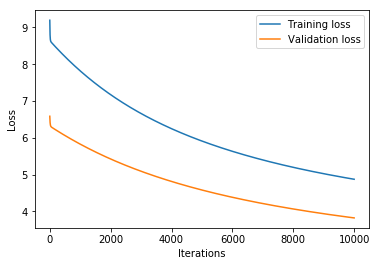

In [5]:
'''Plotting the training VS validation loss for learning rate 0.01'''

plt.plot(loss1, label = "Training loss")
plt.plot(val_loss1, label = "Validation loss")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='upper right')

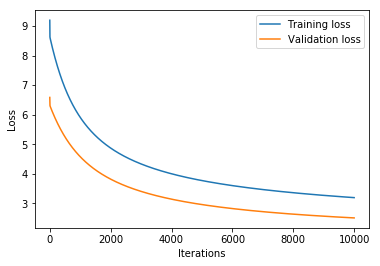

In [6]:
'''Plotting the training VS validation loss for learning rate 0.05'''
plt.plot(loss2, label = "Training loss")
plt.plot(val_loss2, label = "Validation loss")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='upper right')

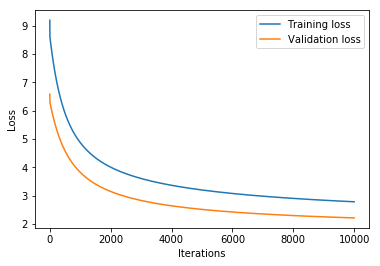

In [7]:
'''Plotting the training VS validation loss for learning rate 0.1'''
plt.plot(loss3, label = "Training loss")
plt.plot(val_loss3, label = "Validation loss")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='upper right')

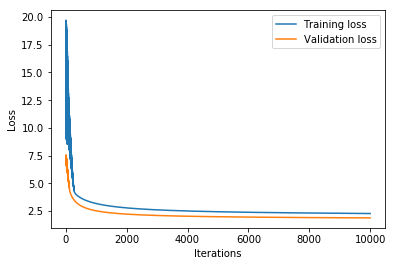

In [8]:
'''Plotting the training VS validation loss for learning rate 0.5'''
plt.plot(loss4, label = "Training loss")
plt.plot(val_loss4, label = "Validation loss")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='upper right')

In [0]:
# Implementing the test function

def test(X_test, Y_test, W, b):
    
    test_size = X_test.shape[0]
    count = 0 # Count of correctly predicted values
    tp = 0 # True positives count
    fp = 0 # False positives count
    tn = 0 # True negatives count
    fn = 0 # False negatives count
    
    precision = 0
    recall = 0
    accuracy = 0
    
    z = np.dot(X_test, W) + b
    predictions = sigmoid(z)
    
    '''The values in predictions are decimal values between 0 and 1. To round them to the nearest integer, we use numpy's rint'''
    for i in range(len(predictions)):
      
      predictions[i] = np.rint(predictions[i])
    
    for (pred, actual) in zip(predictions, Y_test):
        
        if pred == actual:
            
            count = count + 1
            
        if pred == 1 and actual == 1:
            
            tp = tp + 1
        
        elif pred == 0 and actual == 0:
            
            tn = tn + 1
            
        elif pred == 1 and actual == 0:
            
            fp = fp + 1
        
        else:
            
            fn = fn + 1
                
                
    if tp + tn + fp + fn != 0:
        
        accuracy = (tp + tn)/(tp + tn + fp + fn)
    
    if tp + fp != 0:
        
        precision = tp/(tp + fp)
        
    if tp + fn != 0:
        
        recall = tp/(tp + fn)
        
    
    
    return accuracy, precision, recall

In [0]:
'''Storing weights and biases for different learning rates in a single list'''

train_weights = []
train_biases = []

train_weights.append(weight1)
train_weights.append(weight2)
train_weights.append(weight3)
train_weights.append(weight4)

train_biases.append(bias1)
train_biases.append(bias2)
train_biases.append(bias3)
train_biases.append(bias4)

In [11]:
learning_rates = [0.01, 0.05, 0.1, 0.5]
accuracies = []
precisions = []
recalls = []

'''Finding accuracy, precision, recall for each learning rate and storing them in separate lists'''
for i in range(len(learning_rates)):
    
    accuracy, precision, recall = test(X_test, Y_test, train_weights[i], train_biases[i])
    print("For learning rate = ", learning_rates[i])
    print("Accuracy = ", accuracy*100, " Precision = ", precision*100, "Recall = ", recall*100)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

For learning rate =  0.01
Accuracy =  87.32394366197182  Precision =  97.1830985915493 Recall =  66.99029126213593
For learning rate =  0.05
Accuracy =  90.14084507042254  Precision =  91.20879120879121 Recall =  80.58252427184466
For learning rate =  0.1
Accuracy =  91.19718309859155  Precision =  90.625 Recall =  84.46601941747572
For learning rate =  0.5
Accuracy =  92.6056338028169  Precision =  91.83673469387756 Recall =  87.37864077669903


Text(0, 0.5, 'Accuracy')

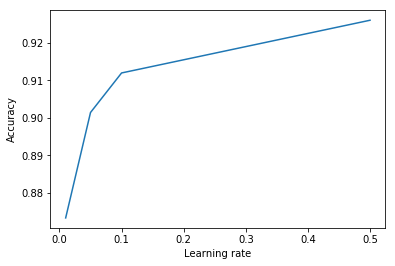

In [12]:
'''Plotting the learning rate VS accuracy graph'''
plt.plot(learning_rates, accuracies)

plt.xlabel("Learning rate")
plt.ylabel("Accuracy")

In [0]:
'''Training the dataframe for a fixed learning rate and varying the epochs'''

def train_iterations(X_train, Y_train, iterations):

    X_train = X_train.T
    Y_train = np.array(Y_train).reshape(1, Y_train.shape[0])
    
    '''Initializing the weights matrix to 0'''
    W = np.zeros((X_train.shape[0], 1))
    
    '''Initializing bias to 0'''
    b = 0
    m = X.shape[1] # No of input samples
    losstrack = [] # To store losses at very epoch
    learning_rate = 0.5
    
    for iterations in range(iterations):
        
        z = np.dot(W.T, X_train) + b # Initial predictions
        p = sigmoid(z) # Predictions in the range [0,1]
        cost = -np.sum(np.multiply(np.log(p), Y_train) + np.multiply((1 - Y_train), np.log(1 - p)))/m  #Cost function to calculate the loss at every epoch
        losstrack.append(np.squeeze(cost)) 
        
        '''Finding derivatives'''
        dz = p - Y_train
        dW = (1/m) * np.dot(X_train, dz.T)
        db = (1/m) * np.sum(dz)

        '''Updating the weights and biases after each epoch'''
        W = W - learning_rate * dW
        b = b - learning_rate * db

    return W, b, losstrack

In [0]:
'''Considering learning rates of 1000, 10000, 50000, 100000 and storing the weight, bias and loss obtained from the training for the training set'''

iter_weight1, iter_bias1 , iter_loss1 = train_iterations(X_train, Y_train, 1000)

iter_weight2, iter_bias2 , iter_loss2 = train_iterations(X_train, Y_train, 10000)

iter_weight3, iter_bias3 , iter_loss3 = train_iterations(X_train, Y_train, 50000)

iter_weight4, iter_bias4 , iter_loss4 = train_iterations(X_train, Y_train, 100000)

In [0]:
'''Storing weights and biases for different epochs in a single list'''

iter_train_weights = []
iter_train_biases = []

iter_train_weights.append(iter_weight1)
iter_train_weights.append(iter_weight2)
iter_train_weights.append(iter_weight3)
iter_train_weights.append(iter_weight4)

iter_train_biases.append(iter_bias1)
iter_train_biases.append(iter_bias2)
iter_train_biases.append(iter_bias3)
iter_train_biases.append(iter_bias4)

In [25]:
iterations_list = [1000, 10000, 50000, 100000]
iter_accuracies = []
iter_precisions = []
iter_recalls = []

'''Finding accuracy, precision, recall for each epoch value and storing them in separate lists'''
for i in range(len(iterations_list)):
    
    accuracy, precision, recall = test(X_test, Y_test, iter_train_weights[i], iter_train_biases[i])
    print("For ", iterations_list[i], " iterations")
    print("Accuracy = ", accuracy*100, " Precision = ", precision*100, "Recall = ", recall*100)
    
    iter_accuracies.append(accuracy)
    iter_precisions.append(precision)
    iter_recalls.append(recall)

For  1000  iterations
Accuracy =  90.14084507042254  Precision =  91.20879120879121 Recall =  80.58252427184466
For  10000  iterations
Accuracy =  92.6056338028169  Precision =  91.83673469387756 Recall =  87.37864077669903
For  50000  iterations
Accuracy =  93.30985915492957  Precision =  93.75 Recall =  87.37864077669903
For  100000  iterations
Accuracy =  93.66197183098592  Precision =  93.81443298969072 Recall =  88.3495145631068


Text(0, 0.5, 'Accuracy')

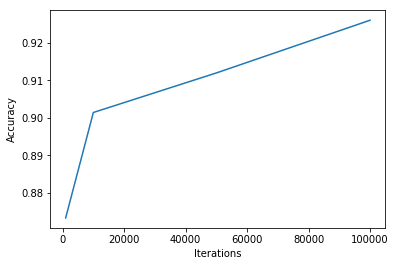

In [26]:
'''Plotting the accuracy VS learning rate graph'''
plt.plot(iterations_list, accuracies)

plt.xlabel("Iterations")
plt.ylabel("Accuracy")